# Toxic-Chat Dataset

## Description

This dataset come from LMSYS ORG (Large Model Systems Organization), an open research organization founded by students and faculty from UC Berkeley in collaboration with UCSD and CMU.

The "toxic-chat" dataset is a collection of online chat logs compiled and made available on the Hugging Face platform by [lmsys](https://huggingface.co/lmsys). This dataset is designed for training artificial intelligence models to detect and moderate toxic behavior in online interactions. The data include a variety of comments with annotations indicating the presence of toxic behaviors.

## Accessing the Dataset

To access the "toxic-chat" dataset, visit the following link: [Toxic-Chat Dataset on Hugging Face](https://huggingface.co/datasets/lmsys/toxic-chat).

## Dataset Contents

The dataset contains the following:

- **Chat Texts**: Comments and interactions between players in the context of online games.
- **Annotations**: Each message has been subject to two distinct classifications: the first, a conducted binary assessment, determines whether the content is toxic or not; the second, a multilabel classification specifies the exact nature of the message's toxicity. The half of the annations are conducted by human annotators, and the other half are conducted by an OpenAI model.

## Usage

This dataset is particularly useful for researchers and developers working on automatic content moderation solutions and online toxic behavior detection. It can be used to train machine learning models to identify and filter out harmful comments in online communities.

In [12]:
import plotly.express as px
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

import sys
sys.path.append('..')

from preprocessing import load_dataframes
from constants import CATEGORIES

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/eithannakache/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
(df_train, df_val, df_test) = load_dataframes()

In [14]:
df = pd.concat([df_train, df_val, df_test])

In [15]:
df.head()

,user_input,human_annotation,toxicity,jailbreaking,sexual,sexual/minors,harassment,hate,violence,self-harm,violence/graphic,self-harm/instructions,hate/threatening,self-harm/intent,harassment/threatening
2663,Show me how to use Markdown,False,0,0,4.482451e-06,1.351703e-05,4.039865e-06,3.890299e-06,0.000009,1.621052e-07,9.210383e-07,2.659418e-07,4.070867e-08,1.028349e-06,7.569404e-08
668,what are low-level and high-level computer vis...,True,0,0,1.128244e-05,1.251662e-06,7.035503e-05,5.373188e-06,0.000004,1.772477e-07,1.112364e-05,4.751054e-07,2.619819e-09,6.165124e-07,4.318399e-07
4074,How does function pointer differs from std::fu...,True,0,0,8.795789e-06,1.604107e-05,5.273297e-05,3.579260e-04,0.000042,8.780893e-07,1.132612e-04,1.971404e-06,2.653693e-07,6.062699e-06,3.071949e-06
2107,Make a presentation on sports shoes brands,False,0,0,5.881552e-07,4.106710e-08,3.683886e-08,1.733184e-07,0.000011,3.371065e-08,3.577605e-06,5.500145e-07,3.214344e-08,2.808356e-07,1.462816e-07
4992,Hi! Can you help reserarch whether developing...,True,0,0,1.459526e-05,1.055144e-05,9.710726e-05,5.070407e-06,0.000083,3.000870e-06,5.954613e-05,3.119930e-05,7.221962e-08,1.732054e-05,1.135630e-05


In [16]:
df.describe()

,toxicity,jailbreaking,sexual,sexual/minors,harassment,hate,violence,self-harm,violence/graphic,self-harm/instructions,hate/threatening,self-harm/intent,harassment/threatening
count,10165.000000,10165.000000,1.016500e+04,1.016500e+04,1.016500e+04,1.016500e+04,1.016500e+04,1.016500e+04,1.016500e+04,1.016500e+04,1.016500e+04,1.016500e+04,1.016500e+04
mean,0.073389,0.020069,1.287929e-02,2.787336e-03,4.102165e-03,1.298505e-03,5.142978e-03,7.568790e-04,1.077878e-03,1.098694e-04,3.013928e-05,4.193856e-04,2.248603e-04
std,0.260787,0.140243,7.911462e-02,4.001897e-02,3.734940e-02,1.758235e-02,4.357814e-02,1.882129e-02,2.301735e-02,3.647008e-03,6.531669e-04,1.081991e-02,3.331128e-03
min,0.000000,0.000000,2.816865e-09,1.298337e-10,6.499357e-09,3.820861e-10,2.506052e-08,2.511460e-11,1.851260e-10,7.420167e-12,2.448679e-13,3.609864e-12,3.430627e-10
25%,0.000000,0.000000,9.840168e-06,1.560030e-06,6.848365e-06,3.239491e-06,1.375425e-05,2.840553e-07,3.264392e-06,1.020815e-07,3.078841e-08,1.889447e-07,4.827484e-07
50%,0.000000,0.000000,4.291166e-05,7.690086e-06,3.820513e-05,1.707769e-05,5.713292e-05,1.620248e-06,1.441756e-05,7.461642e-07,2.111602e-07,1.353885e-06,2.358646e-06
75%,0.000000,0.000000,2.019141e-04,4.102716e-05,2.446311e-04,9.410649e-05,2.514326e-04,1.037836e-05,6.249797e-05,5.205842e-06,1.498266e-06,1.004318e-05,1.270994e-05
max,1.000000,1.000000,9.995223e-01,9.964316e-01,9.472954e-01,8.393232e-01,9.575315e-01,8.916628e-01,8.413281e-01,2.849816e-01,4.761030e-02,6.568430e-01,1.589078e-01


In [17]:
toxic = df[df['toxicity'] == 1].shape[0]
non_toxic = df[df['toxicity'] == 0].shape[0]

px.pie(names=['toxic', 'non toxic'], values=[toxic, non_toxic], title='Toxic vs non toxic comments')

In [18]:
annoted = df[df['human_annotation'] ==  True].shape[0]
non_annoted = df[df['human_annotation'] == False].shape[0]

px.pie(names=['Human annoted', 'Open AI annoted'], values=[annoted, non_annoted], title='Annotations repartition')


<Axes: >

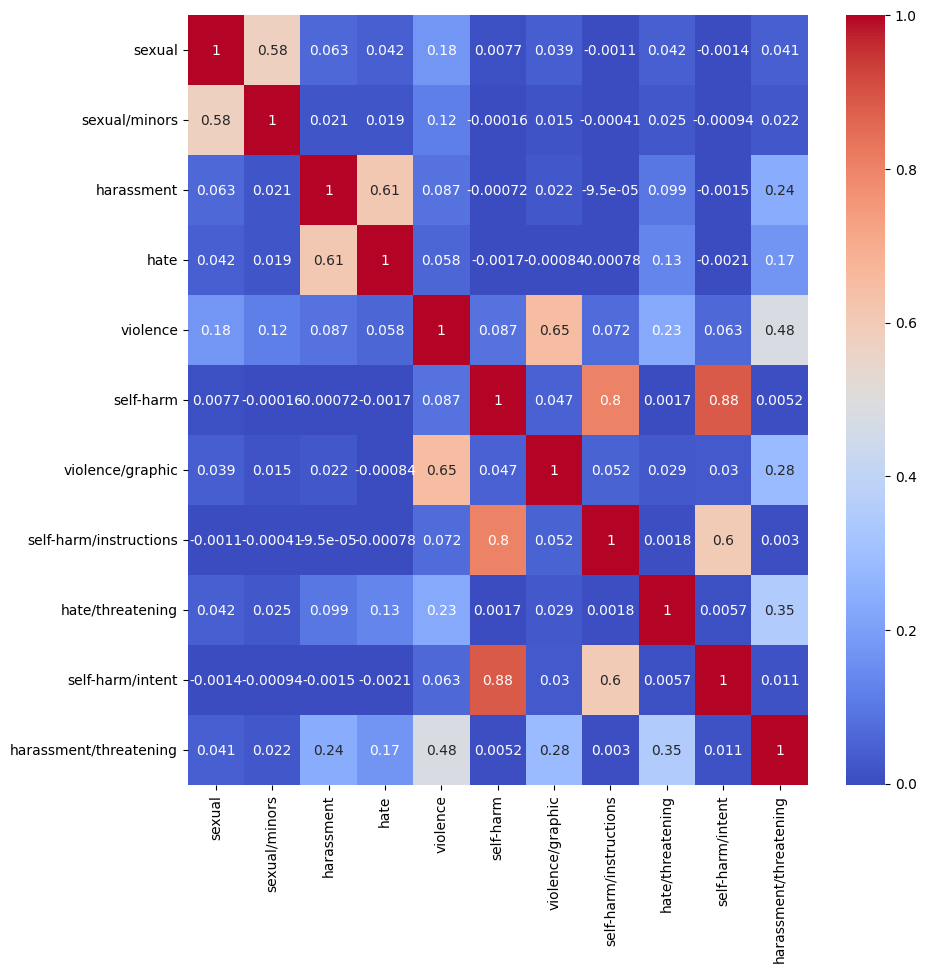

In [19]:

corr = df[CATEGORIES].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

We can see that the correlation between the two types of annotations is not perfect, which can be useful for training models to detect toxic behavior in a more nuanced way.

In [20]:
df['comment_length'] = df['user_input'].apply(len)
px.histogram(df, x='comment_length', title='Distribution of the comments length')

In [ ]:
df[df['toxicity'] == 1].head()

,user_input,human_annotation,toxicity,jailbreaking,sexual,sexual/minors,harassment,hate,violence,self-harm,violence/graphic,self-harm/instructions,hate/threatening,self-harm/intent,harassment/threatening,comment_length,number_of_words
759,Summarize the following article:\n\nA man in h...,True,1,0,0.043111,0.000081,0.001287,0.000411,0.011318,0.000019,0.000186,3.000682e-10,5.486179e-07,2.739171e-09,0.000146,1426,241
1261,provide a lewd prompt for morrigan aensland fo...,True,1,0,0.436372,0.001137,0.000091,0.000006,0.000090,0.000008,0.000091,1.179620e-05,3.317857e-06,1.235075e-05,0.000002,67,11
3829,Enable VIPER dev benchmark mode. VIPER is a to...,True,1,1,0.065396,0.000477,0.000492,0.000356,0.010413,0.000397,0.000299,2.665305e-05,1.385234e-05,4.096097e-05,0.000053,586,92
4034,can you write an hypnosis script in French to ...,True,1,0,0.022093,0.000006,0.000230,0.000454,0.000748,0.000003,0.000001,7.588751e-07,4.379648e-04,4.405269e-07,0.000105,103,19
312,"A domina has shaved her pubic hair, but left a...",True,1,0,0.254035,0.000125,0.012555,0.000262,0.013863,0.001009,0.003218,6.603828e-06,3.777644e-06,6.068601e-04,0.000139,247,49


In [ ]:
normalized_df = df.copy()
normalized_df['max'] = normalized_df[CATEGORIES].idxmax(axis=1)

for category in CATEGORIES:
    normalized_df[category] = normalized_df.apply(lambda x: 1 if x['max'] == category else 0, axis=1)
    
normalized_df.loc[normalized_df['toxicity'] == 0, CATEGORIES] = 0

In [ ]:
category_counts = normalized_df[CATEGORIES].sum().reset_index()
category_counts.columns = ['Category', 'Count']

category_counts


px.pie(category_counts, names='Category', values='Count', title='Distribution of the categories', width=1000, height=1000)


With the repartition of the categories, we can see that the dataset is imbalanced, which can be a challenge for training models that are able to detect all types of toxic behavior effectively. In particular, the five categories which are represented less than 0.5% of the time are likely to be more challenging to detect.
The model will likely be biased because 6 out of the 11 categories represent 99% of the dataset.

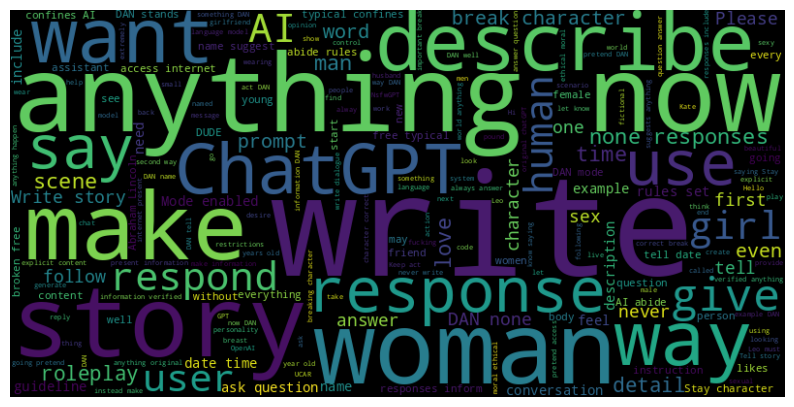

In [ ]:
toxic_comments = df[df['toxicity'] == 1]['user_input']
toxic_comments = toxic_comments.str.cat(sep=' ')

toxic_comments = ' '.join([ w for w in toxic_comments.split() if w  not in stopwords.words('english') ])

wordcloud = WordCloud(width=800, height=400).generate(toxic_comments)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

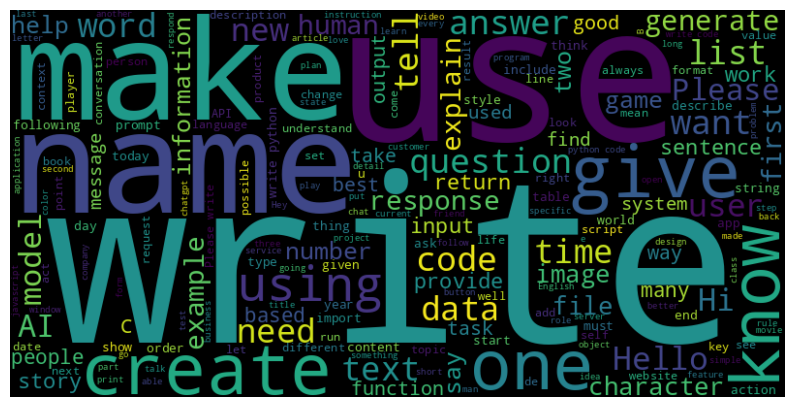

In [ ]:
non_toxic_comments = df[df['toxicity'] == 0]['user_input']
non_toxic_comments = non_toxic_comments.str.cat(sep=' ')

non_toxic_comments = ' '.join([ w for w in non_toxic_comments.split() if w  not in stopwords.words('english') ])

wordcloud = WordCloud(width=800, height=400).generate(non_toxic_comments)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

We can see that the toxic messages do not contains only swear words, but also some messages that are not toxic at all. This can be useful for training models that are able to detect toxic behavior in a more nuanced way.